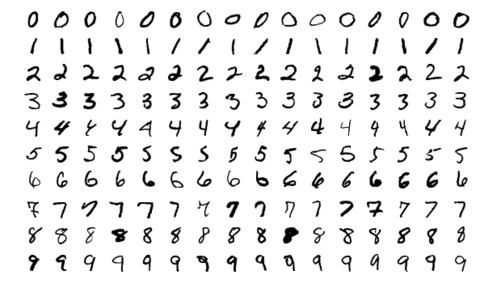

# MNIST Dataset

In [1]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
y_train_full.shape

(60000,)

In [6]:
y_train_full[0]

5

In [7]:
img = X_train_full[0]
img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

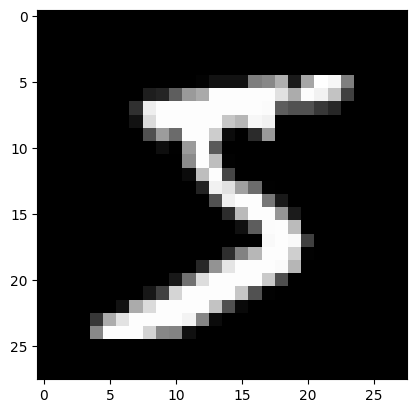

In [8]:
plt.imshow(img, cmap="gray")

In [9]:
label = y_train_full[0]
label

5

<AxesSubplot:>

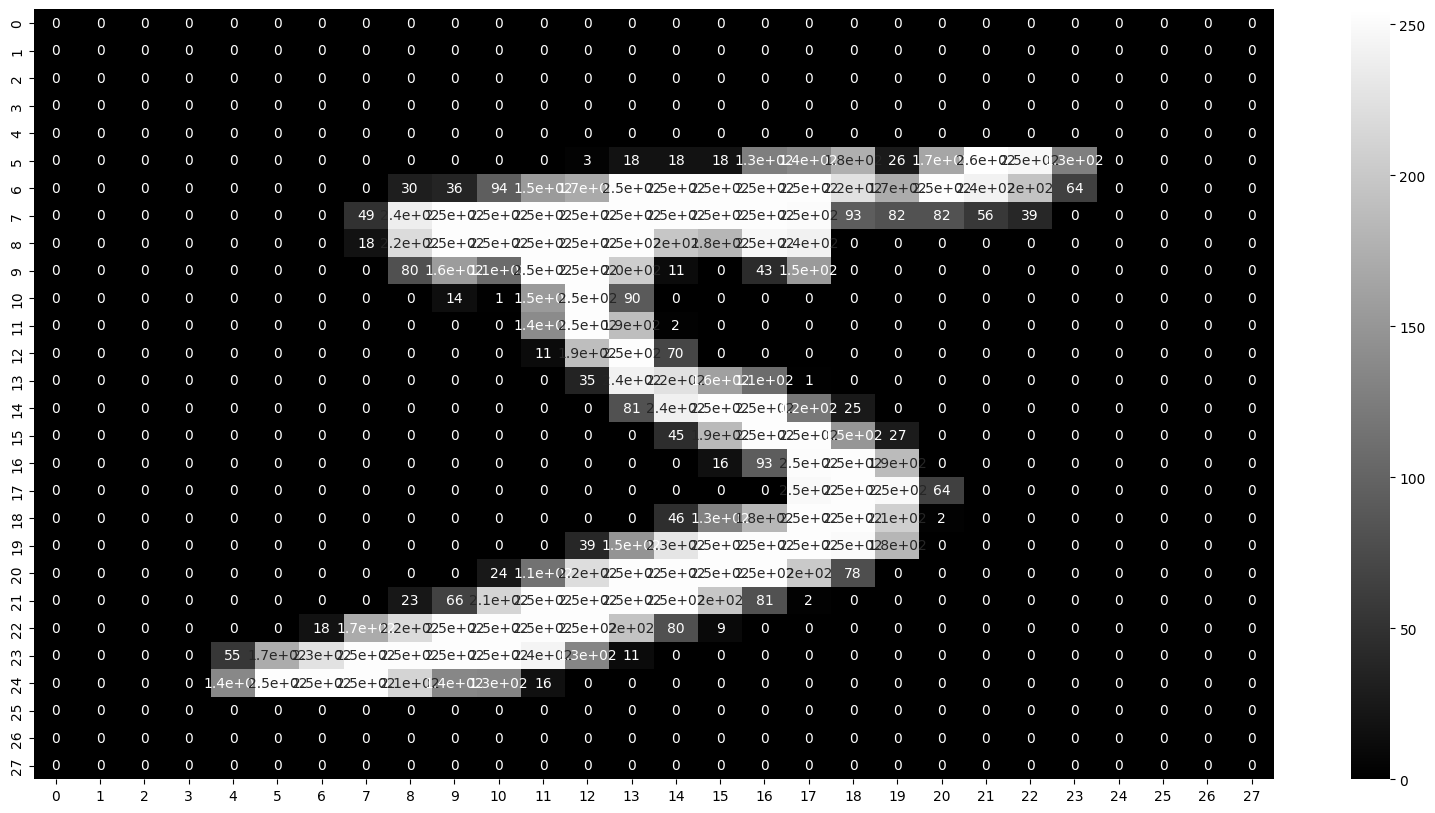

In [10]:
plt.figure(figsize=(20,10))
sns.heatmap(img, annot=True, cmap="gray")

<AxesSubplot:>

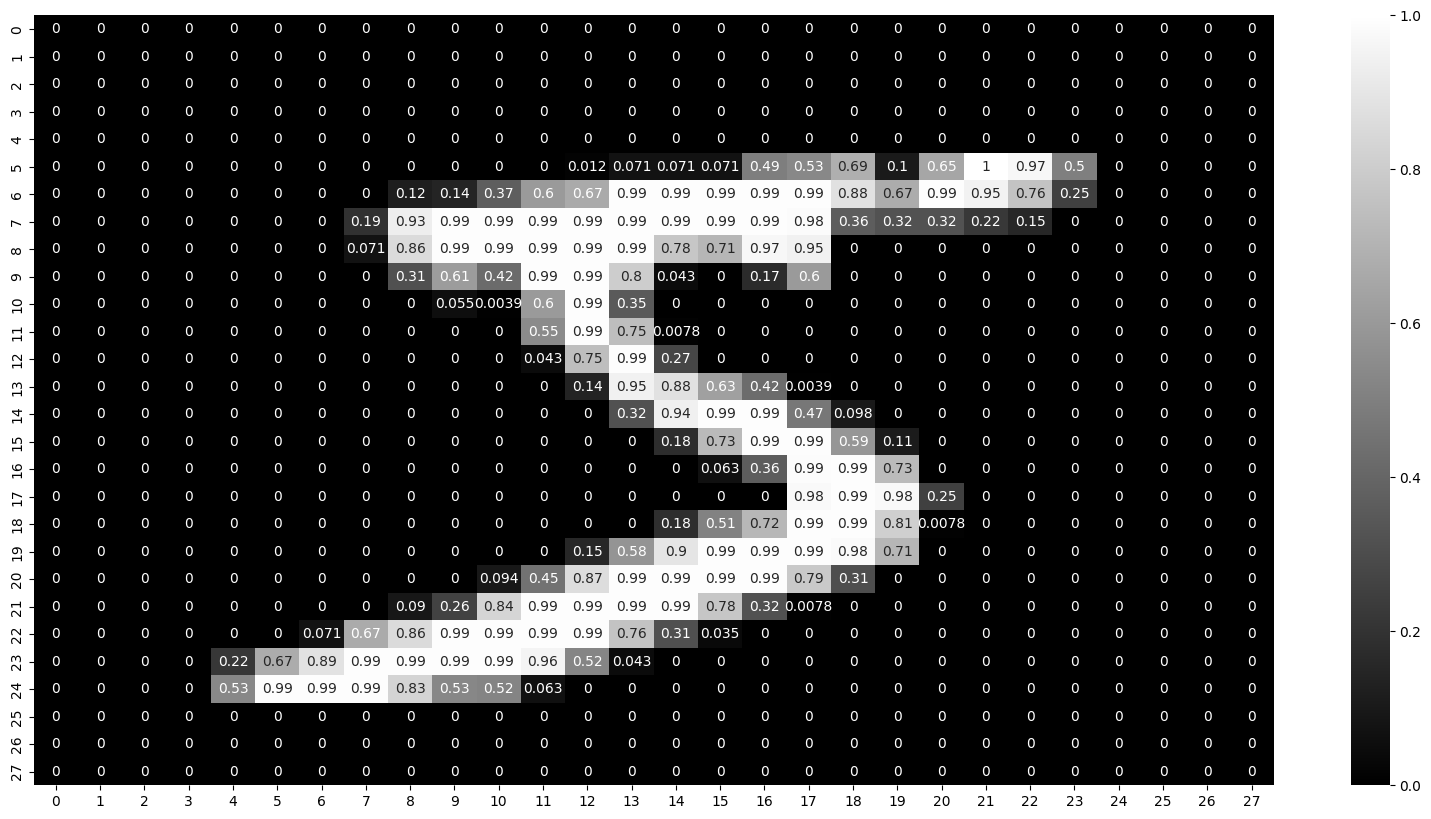

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(img/255, annot=True, cmap="gray")

1.  *0 -> 255* => More computation time, and Search space is large for finding solution. 
2.  *0 -> 1* => Less computation time, and Search space is small for finding solution.

In [12]:
X_valid, X_train = X_train_full[:5000]/255, X_train_full[5000:]/255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

X_test = X_test/255

In [13]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [14]:
len(np.unique(y_train))

10

In [15]:
CLASSES = len(np.unique(y_train))
CLASSES

10

In [16]:
LAYERS = [
    tf.keras.layers.Flatten(input_shape=(28,28), name="inputLayer"),
    tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer01"),
    tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer02"),
    tf.keras.layers.Dense(CLASSES, activation="softmax", name="outputLayer"),
    
]

In [17]:
model_clf = tf.keras.models.Sequential(LAYERS)

In [18]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer01 (Dense)       (None, 300)               235500    
                                                                 
 hiddenLayer02 (Dense)       (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [19]:
784*300+300

235500

In [20]:
300*100+100

30100

In [21]:
100*10+10

1010

In [22]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZERS = "SGD"
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION, optimizer=OPTIMIZERS, metrics=METRICS)

In [23]:
EPOCHS = 30 
VALIDATION = (X_valid, y_valid)

history = model_clf.fit(
    X_train,
    y_train,
    epochs = EPOCHS,
    batch_size = 32,
    validation_data = VALIDATION
) 

Epoch 1/30
1719/1719 [==============================] - 6s 2ms/step - loss: 0.5960 - accuracy: 0.8466 - val_loss: 0.2974 - val_accuracy: 0.9184
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2788 - accuracy: 0.9212 - val_loss: 0.2387 - val_accuracy: 0.9338
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2275 - accuracy: 0.9356 - val_loss: 0.1976 - val_accuracy: 0.9440
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1953 - accuracy: 0.9445 - val_loss: 0.1739 - val_accuracy: 0.9530
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1709 - accuracy: 0.9515 - val_loss: 0.1580 - val_accuracy: 0.9578
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1516 - accuracy: 0.9569 - val_loss: 0.1414 - val_accuracy: 0.9618
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1362 - accuracy: 0.9607 - val_loss: 0.1322 - val_accuracy:

In [24]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.595989,0.846600,0.297437,0.9184
1,0.278791,0.921236,0.238748,0.9338
2,0.227477,0.935582,0.197623,0.9440
3,0.195331,0.944527,0.173865,0.9530
4,0.170857,0.951473,0.158016,0.9578
5,0.151586,0.956855,0.141412,0.9618
6,0.136234,0.960709,0.132181,0.9636
7,0.123101,0.964836,0.121801,0.9654
8,0.112024,0.967836,0.114764,0.9674
9,0.102622,0.971618,0.107079,0.9714


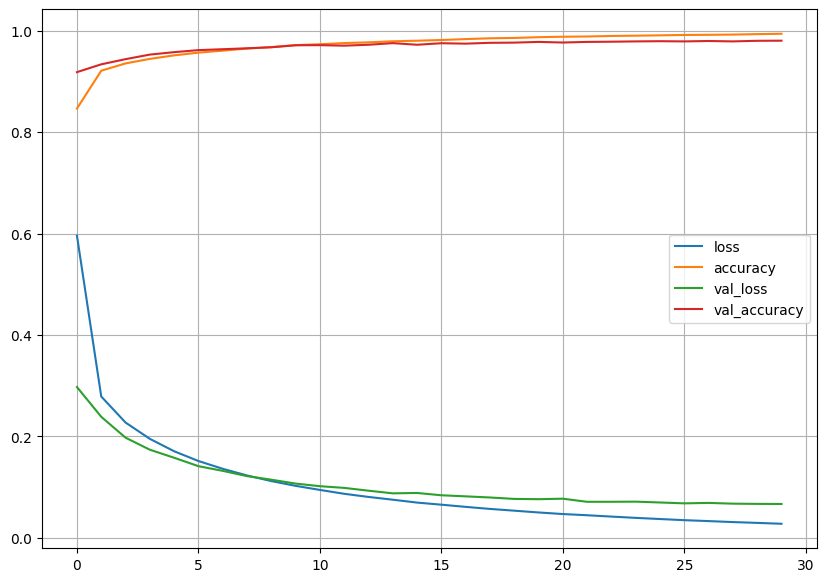

In [25]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.grid(True)
plt.show()

In [26]:
model_clf.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0680 - accuracy: 0.9789


[0.06801118701696396, 0.9789000153541565]

In [27]:
model_clf.save("mnist_full.h5")

In [28]:
X_new = X_test[:3]
y_prob = model_clf.predict(X_new)
y_prob.round(3)

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.998, 0.   , 0.   , 0.001, 0.   , 0.   , 0.001, 0.   ,
        0.   ]], dtype=float32)

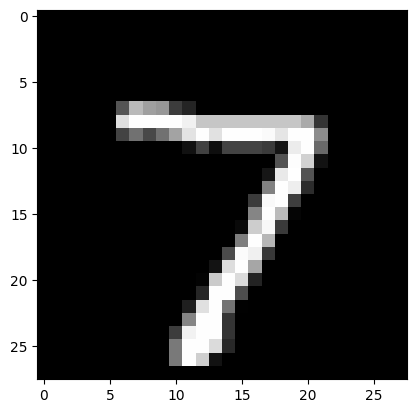

In [29]:
plt.imshow(X_new[0], cmap="gray")

In [30]:
Y_pred = np.argmax(y_prob, axis=-1)
Y_pred

array([7, 2, 1], dtype=int64)

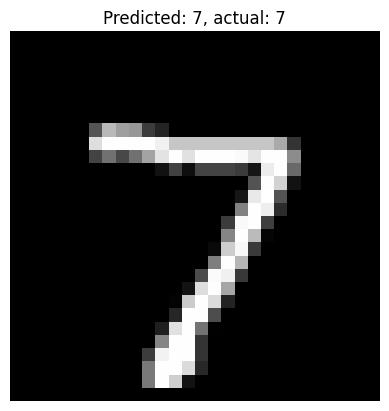

------------------------------------------------------------


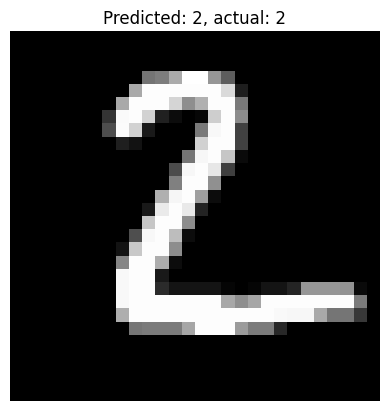

------------------------------------------------------------


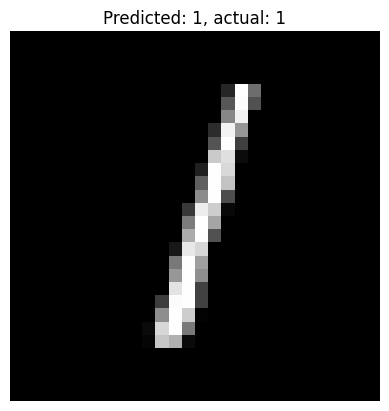

------------------------------------------------------------


In [31]:
for img_array, pred, actual in zip(X_new, Y_pred, y_test[:3]):
    plt.imshow(img_array, cmap="gray")
    plt.title(f"Predicted: {pred}, actual: {actual}")
    plt.axis("off")
    plt.show()
    print("--"*30)

In [32]:
for kohli, dhoni, dravid in zip([1,2,3],[3,2,1],[3,3,3]):
    print(kohli, dhoni, dravid)

1 3 3
2 2 3
3 1 3


Transfer Learning

New problem statement - Classify handwritten digits into odd and even 

In [33]:
pretrained_model = tf.keras.models.load_model("mnist_full.h5")

In [34]:
pretrained_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer01 (Dense)       (None, 300)               235500    
                                                                 
 hiddenLayer02 (Dense)       (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [35]:
for layer in pretrained_model.layers:
    print(f"{layer}, {layer.name}: {layer.trainable}")

<keras.layers.core.flatten.Flatten object at 0x000001F3849AD208>, inputLayer: True
<keras.layers.core.dense.Dense object at 0x000001F389390B08>, hiddenLayer01: True
<keras.layers.core.dense.Dense object at 0x000001F3893907C8>, hiddenLayer02: True
<keras.layers.core.dense.Dense object at 0x000001F3849ADDC8>, outputLayer: True


In [36]:
for layer in pretrained_model.layers[:-1]:# leave the last layer
    layer.trainable = False

In [37]:
for layer in pretrained_model.layers:
    print(f"{layer.name}: {layer.trainable}")

inputLayer: False
hiddenLayer01: False
hiddenLayer02: False
outputLayer: True


In [38]:
lower_pretrained_model = pretrained_model.layers[:-1]

In [41]:
new_model = tf.keras.models.Sequential(lower_pretrained_model)
new_model.add(
    tf.keras.layers.Dense(2,activation="softmax")
)

In [42]:
new_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer01 (Dense)       (None, 300)               235500    
                                                                 
 hiddenLayer02 (Dense)       (None, 100)               30100     
                                                                 
 dense (Dense)               (None, 2)                 202       
                                                                 
Total params: 265,802
Trainable params: 202
Non-trainable params: 265,600
_________________________________________________________________


In [43]:
def update_even_odd_labels(labels):
    for idx, label in enumerate(labels):
        labels[idx] = np.where(label%2 == 0, 1, 0) # 1--> even, 0 --> odd
    return labels

In [44]:
y_train_bin, y_test_bin, y_valid_bin = update_even_odd_labels([y_train, y_test, y_valid])

In [45]:
np.unique(y_train_bin)

array([0, 1])

In [46]:
ex_1 = np.array([1,2,3,4,5])
ex_1

array([1, 2, 3, 4, 5])

In [50]:
for idx, label in enumerate(ex_1):
    #print(idx, label)
    print("---------------------")
    print(ex_1[idx], np.where(label%2 == 0, 1, 0))

---------------------
1 0
---------------------
2 1
---------------------
3 0
---------------------
4 1
---------------------
5 0


In [51]:
new_model.compile(loss="sparse_categorical_crossentropy",
                 optimizer="SGD",
                 metrics=["accuracy"])

In [52]:
history = new_model.fit(
    X_train, y_train_bin, epochs=10, validation_data= (X_valid, y_valid_bin)
)

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1838 - accuracy: 0.9310 - val_loss: 0.1365 - val_accuracy: 0.9506
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1351 - accuracy: 0.9514 - val_loss: 0.1247 - val_accuracy: 0.9584
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1255 - accuracy: 0.9541 - val_loss: 0.1234 - val_accuracy: 0.9544
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1203 - accuracy: 0.9567 - val_loss: 0.1160 - val_accuracy: 0.9618
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1167 - accuracy: 0.9579 - val_loss: 0.1129 - val_accuracy: 0.9638
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1143 - accuracy: 0.9586 - val_loss: 0.1116 - val_accuracy: 0.9648
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1122 - accuracy: 0.9602 - val_loss: 0.1095 - val_accuracy:

In [53]:
X_new = X_test[:3]
y_prob = new_model.predict(X_new)
y_prob.round(3)

array([[0.997, 0.003],
       [0.001, 0.999],
       [0.969, 0.031]], dtype=float32)

In [54]:
Y_pred = np.argmax(y_prob, axis=-1)
Y_pred

array([0, 1, 0], dtype=int64)

In [57]:
y_test_bin[:3]

array([0, 1, 0])

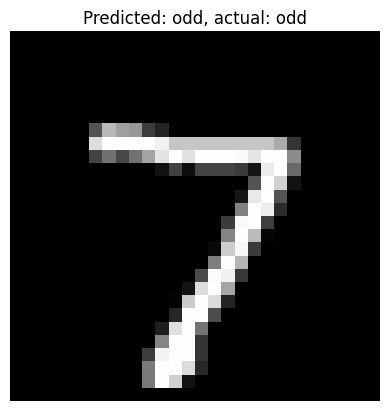

------------------------------------------------------------


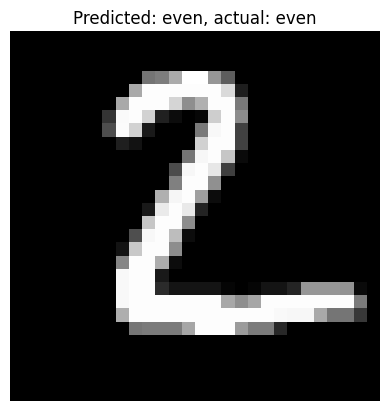

------------------------------------------------------------


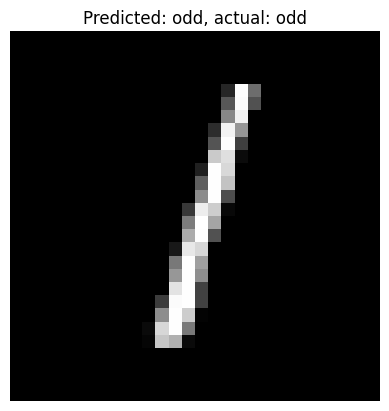

------------------------------------------------------------


In [60]:
for img_array, pred, actual in zip(X_new, Y_pred, y_test_bin[:3]):
    if pred == 1:
        pred = "even"
    else:
        pred = "odd"
    if actual == 1:
        actual = "even"
    else:
        actual = "odd"
    plt.imshow(img_array, cmap="gray")
    plt.title(f"Predicted: {pred}, actual: {actual}")
    plt.axis("off")
    plt.show()
    print("--"*30)

Train a CNN model on MNIST data

In [61]:
X_train.shape

(55000, 28, 28)

In [62]:
X_train[0].shape

(28, 28)

In [63]:
X_train_cnn = np.expand_dims(X_train, -1)
X_test_cnn = np.expand_dims(X_test, -1)
X_valid_cnn = np.expand_dims(X_valid, -1)

In [64]:
X_train_cnn.shape

(55000, 28, 28, 1)

In [65]:
X_train_cnn[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [67]:
input_shape = (28,28,1) # (row, col, channels)
CLASSES = 10
LAYERS = [
    tf.keras.Input(shape=input_shape),
    tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(CLASSES, activation="softmax")
]

In [68]:
CNN_model = tf.keras.Sequential(
    LAYERS
)

In [69]:
CNN_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 10)               

In [70]:
28 - 3 // 1 + 1

26

In [72]:
(26 - 2) // 2+1

13

In [73]:
(3*3+1)*32

320

In [76]:
(3*3*32+1) * 64

18496

In [77]:
1600*10+10

16010

In [80]:
320+18496+16010

34826